In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [179]:
df = pd.read_csv(r"C:\Users\oscar\Documents\games.csv")

In [180]:
meta = pd.read_json(r"C:\Users\oscar\Documents\games_metadata.json", lines=True)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [182]:
df.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [183]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50503 non-null  int64 
 1   description  50503 non-null  object
 2   tags         50503 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [184]:
# merge the game data and metadata
df = df.merge(meta, on='app_id')


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  description     50503 non-null  object 
 14  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.4+ MB


## Data Cleaning

In [186]:
df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'description', 'tags'],
      dtype='object')

### Drop 'description' column, cos not numeric and cat factor

In [187]:
# drop the 'description' column
df = df.drop(['description'], axis = 1)

### Drop missing and duplicate value

In [188]:
# drop empty row
df.isnull().sum(axis=1).sum()

0

In [189]:
df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'tags'],
      dtype='object')

In [190]:
import pandas as pd

# Assuming you have a DataFrame named df
# Convert lists to tuples in the 'tags' column
df['tags'] = df['tags'].apply(tuple)

# Drop duplicate rows and keep the first occurrence of each duplicated row
df.drop_duplicates(inplace=True)

# Restore tuples back to lists in the 'tags' column if needed
df['tags'] = df['tags'].apply(list)

# Check the DataFrame after dropping duplicates
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.0+ MB


In [191]:
# drop the 'app_id', 'title', 'date_release' columns, as they are the categorical and numeric factor
df = df.drop(['title', 'date_release'], axis = 1)

In [192]:
df.head()

,app_id,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


### Clean outliers

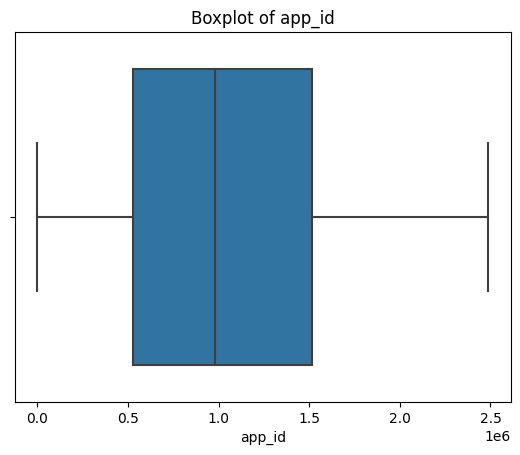

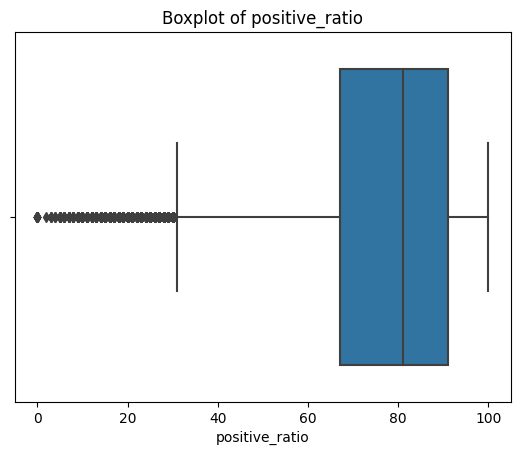

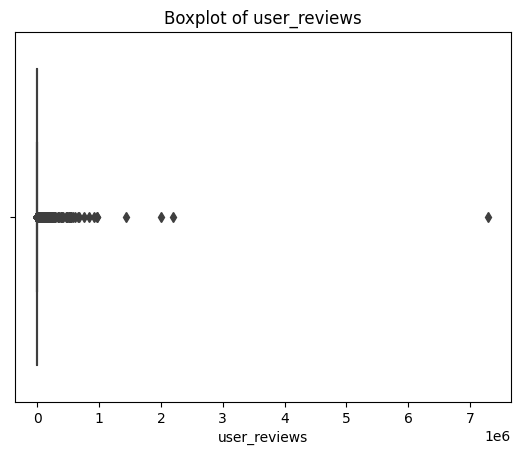

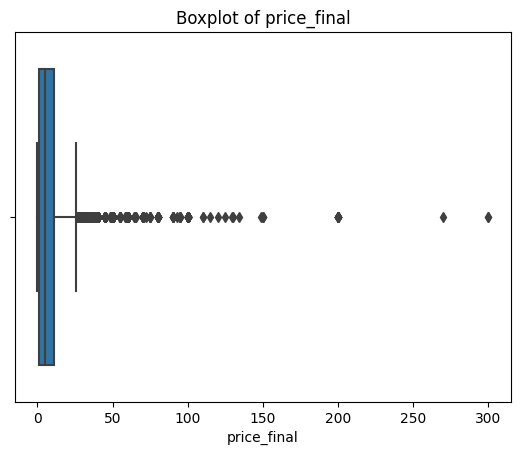

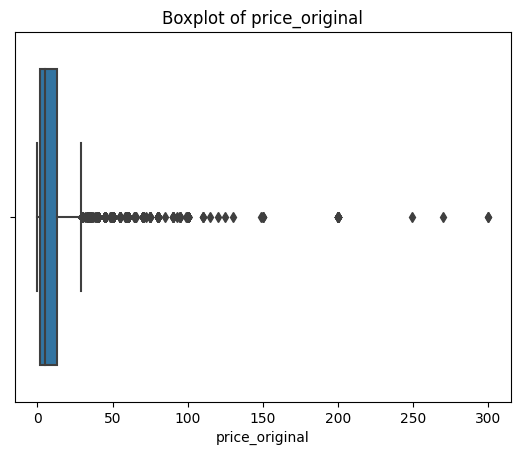

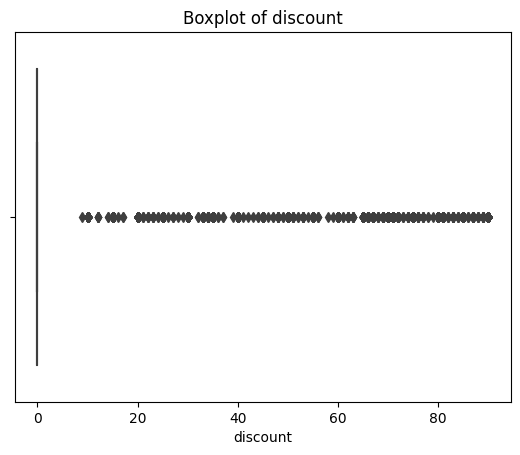

In [193]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [194]:
# create test 1
df_t1 = df

# create test 2
df_t2 = df

### Method 1: Outlier Formula - 1.5 IQR

In [195]:
# Step 1: Calculate the first quartile (Q1) and third quartile (Q3) of the column
Q1 = df_t1['user_reviews'].quantile(0.25)
Q3 = df_t1['user_reviews'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the outlier thresholds (1.5 times the IQR)
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to keep only the rows within the defined thresholds
df_t1 = df_t1[(df_t1['user_reviews'] >= lower_threshold) & (df_t1['user_reviews'] <= upper_threshold)]

### Method 2: 3 SD

In [196]:
# Step 1: Calculate the mean and standard deviation of the column
mean_value = df_t2['user_reviews'].mean()
std_deviation = df_t2['user_reviews'].std()

# Step 2: Define a threshold to identify outliers (3 standard deviations from the mean)
outlier_threshold = 3 * std_deviation

# Step 3: Filter the DataFrame to keep only the rows within the defined threshold
df_t2 = df_t2[abs(df_t2['user_reviews'] - mean_value) <= outlier_threshold]


In [197]:
# drop outliers for test 1
df_t1 = df_t1.drop(df_t1[df_t1['price_final'] > 50].index)

df_t1 = df_t1.drop(df_t1[df_t1['price_original'] > 50].index)

# drop outlier for test 2
df_t2 = df_t2.drop(df_t2[df_t2['price_final'] > 50].index)

df_t2 = df_t2.drop(df_t2[df_t2['price_original'] > 50].index)

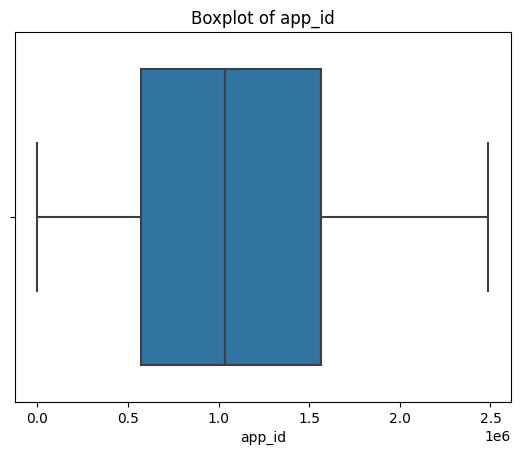

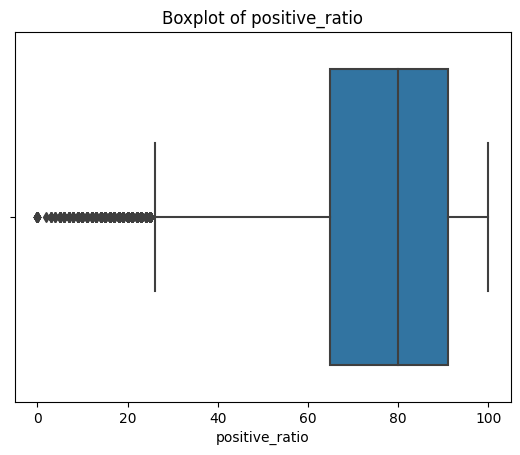

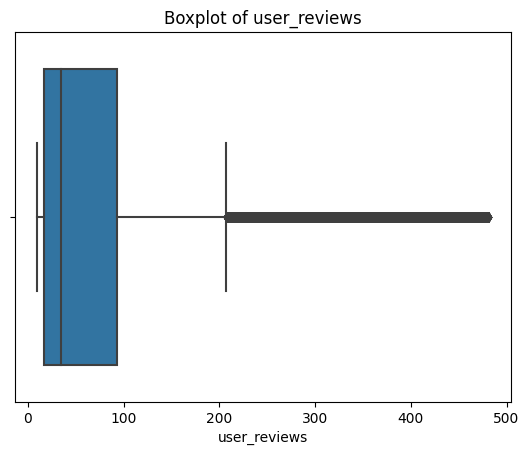

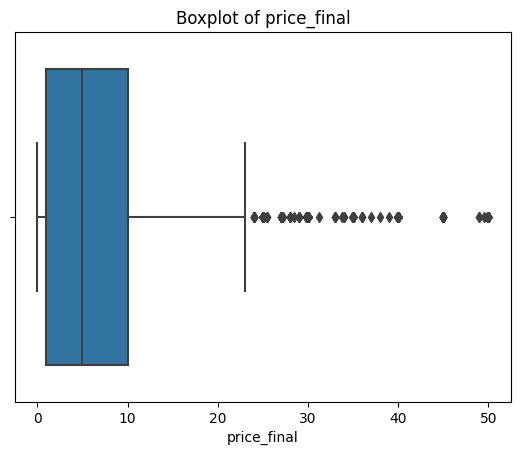

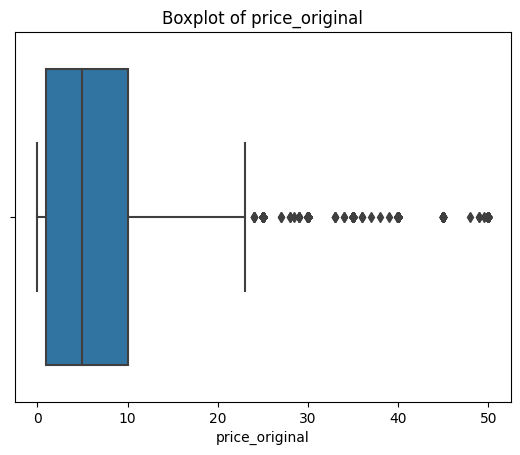

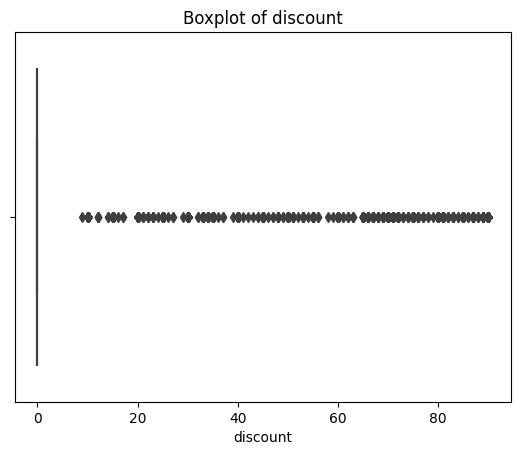

In [198]:
numerical_columns = df_t1.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df_t1)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

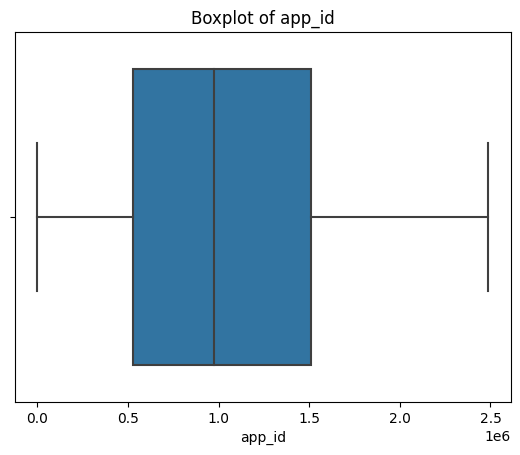

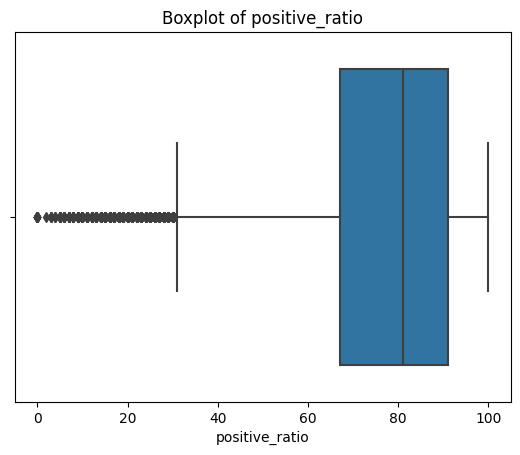

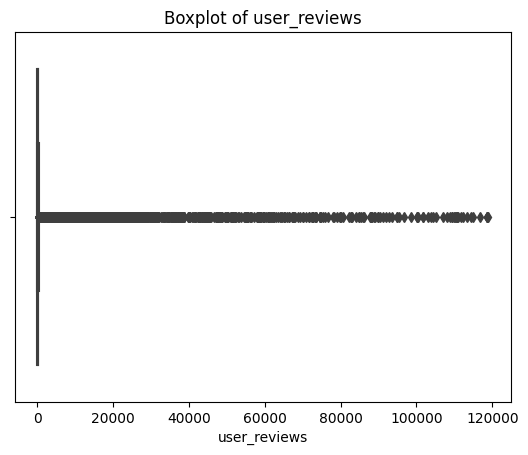

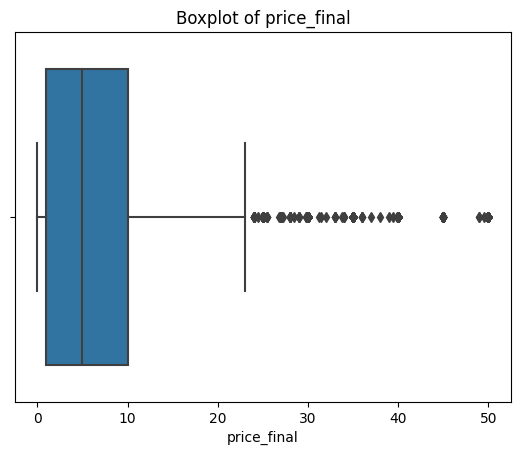

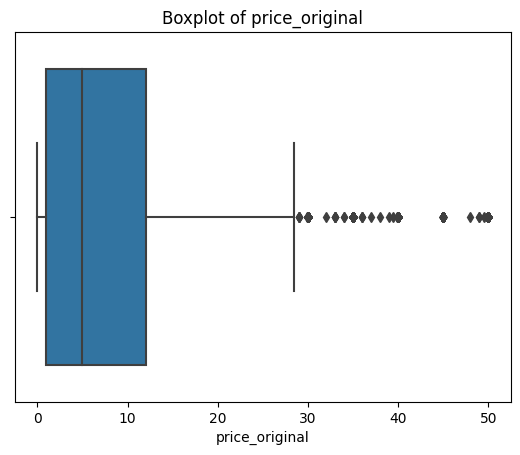

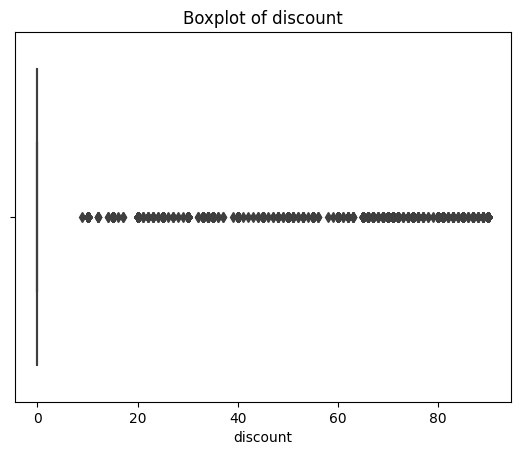

In [199]:
numerical_columns = df_t2.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df_t2)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [200]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.050300e+04,50503.000000,5.050300e+04,50503.000000,50503.000000,50503.000000
mean,1.048405e+06,77.033622,1.776163e+03,8.549623,9.166772,5.716254
std,6.058853e+05,18.261259,3.912721e+04,11.468167,11.917905,18.779479
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.265205e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.793100e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.514985e+06,91.000000,2.040000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


In [201]:
df_t1.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.218600e+04,42186.000000,42186.000000,42186.000000,42186.000000,42186.000000
mean,1.094045e+06,76.134547,77.363675,7.042153,7.557307,5.852178
std,6.032104e+05,18.867024,97.113432,7.967081,8.222626,19.024190
min,6.300000e+02,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.712425e+05,65.000000,17.000000,0.990000,0.990000,0.000000
50%,1.034885e+06,80.000000,35.000000,4.990000,4.990000,0.000000
75%,1.566828e+06,91.000000,93.000000,9.990000,9.990000,0.000000
max,2.488153e+06,100.000000,481.000000,49.990000,49.990000,90.000000


In [202]:
df_t2.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.988000e+04,49880.000000,49880.000000,49880.000000,49880.000000,49880.000000
mean,1.046132e+06,77.068404,933.091018,7.869450,8.432754,5.701464
std,6.044315e+05,18.258345,5404.719851,8.806451,9.085285,18.747949
min,2.000000e+01,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.261375e+05,67.000000,19.000000,0.990000,0.990000,0.000000
50%,9.770150e+05,81.000000,48.000000,4.990000,4.990000,0.000000
75%,1.509878e+06,91.000000,198.000000,9.990000,11.990000,0.000000
max,2.488153e+06,100.000000,118958.000000,49.990000,49.990000,90.000000


#### old_df

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   win             50503 non-null  bool   
 2   mac             50503 non-null  bool   
 3   linux           50503 non-null  bool   
 4   rating          50503 non-null  object 
 5   positive_ratio  50503 non-null  int64  
 6   user_reviews    50503 non-null  int64  
 7   price_final     50503 non-null  float64
 8   price_original  50503 non-null  float64
 9   discount        50503 non-null  float64
 10  steam_deck      50503 non-null  bool   
 11  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(2)
memory usage: 3.3+ MB


#### Method 1

In [208]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42186 entries, 1 to 50502
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          42186 non-null  int64  
 1   win             42186 non-null  bool   
 2   mac             42186 non-null  bool   
 3   linux           42186 non-null  bool   
 4   rating          42186 non-null  object 
 5   positive_ratio  42186 non-null  int64  
 6   user_reviews    42186 non-null  int64  
 7   price_final     42186 non-null  float64
 8   price_original  42186 non-null  float64
 9   discount        42186 non-null  float64
 10  steam_deck      42186 non-null  bool   
 11  tags            42186 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(2)
memory usage: 3.1+ MB


#### Method 2

In [209]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49880 entries, 0 to 50502
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          49880 non-null  int64  
 1   win             49880 non-null  bool   
 2   mac             49880 non-null  bool   
 3   linux           49880 non-null  bool   
 4   rating          49880 non-null  object 
 5   positive_ratio  49880 non-null  int64  
 6   user_reviews    49880 non-null  int64  
 7   price_final     49880 non-null  float64
 8   price_original  49880 non-null  float64
 9   discount        49880 non-null  float64
 10  steam_deck      49880 non-null  bool   
 11  tags            49880 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(2)
memory usage: 3.6+ MB


### The cleaning method 2 is better as it crop less records than method 1 and the change in the mean of the user reviews is smaller than method 1.

In [210]:
# set method 2 dataframe as the dataframe cleaned
df_clean = df_t2

In [205]:
df_clean.head()

,app_id,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [206]:
# show the statistic of the operating system
df_clean[['win', 'mac', 'linux', 'steam_deck']].apply(pd.value_counts)

,win,mac,linux,steam_deck
False,795,37091,41005,2
True,49085,12789,8875,49878


### Drop steam_deck columns as only 2 records without steam deck

In [207]:
df_clean = df_clean.drop('steam_deck', axis=1)

## Exploratory data analysis

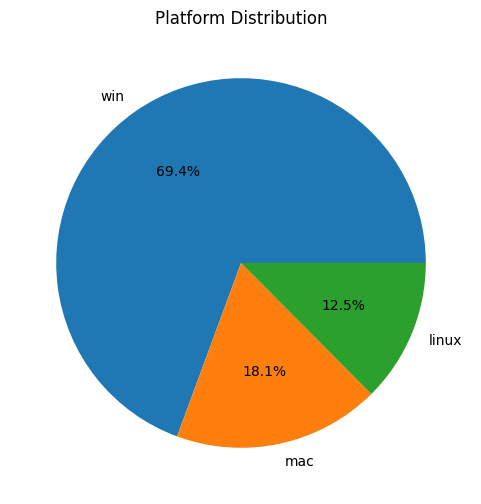

In [211]:
platform_counts = df_clean[['win', 'mac', 'linux']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

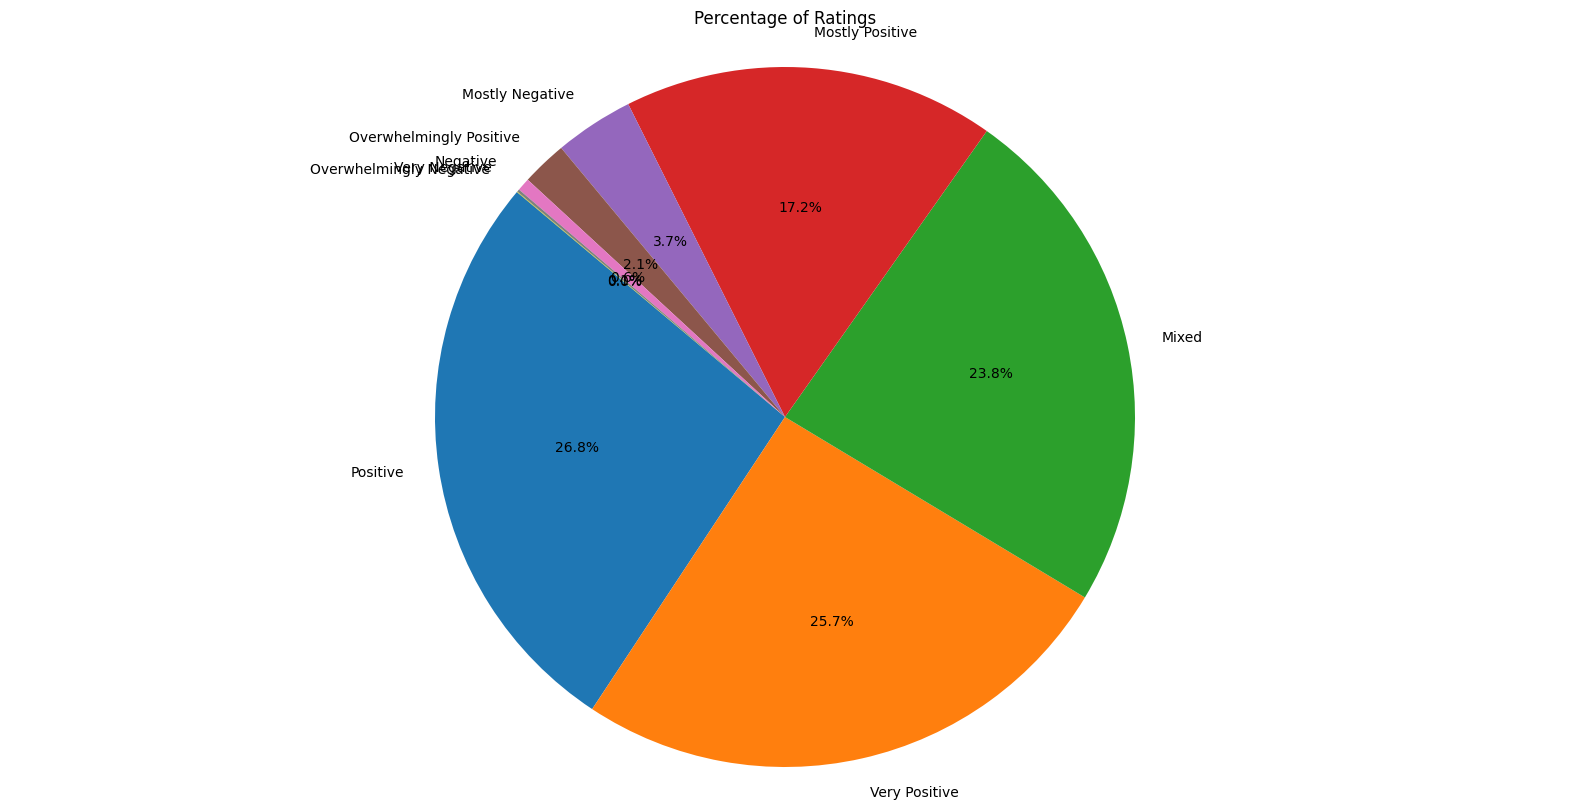

In [212]:
rating_percentage = df_clean['rating'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(rating_percentage, labels=rating_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: xlabel='positive_ratio', ylabel='Count'>

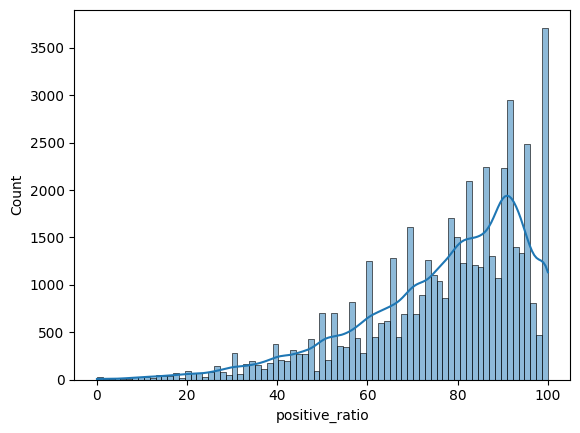

In [213]:
# plot the histograms for all three DataFrames together
sns.histplot(data=df_clean['positive_ratio'], kde=True)


# Feature Engineering

### FE for rating column

In [214]:
df_clean['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [215]:
# create function for determining whether the game is having positive comment or not

def rating_cat(x):
    if x in ['Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 1
    else:
        return 0

#### Create column of showing whether the game is having positive rating or not

In [216]:
df_clean['positive_YN'] = df_clean['rating'].apply(rating_cat)

In [217]:
df_clean = df_clean.drop('rating', axis=1)

In [218]:
df_clean = df_clean.reset_index()

positive_YN
1    27230
0    22650
Name: count, dtype: int64


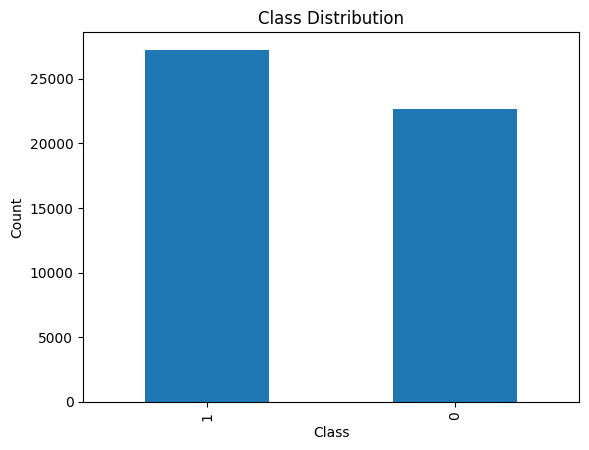

In [219]:
import pandas as pd

# Assuming you have your target variable as a pandas Series 'y'
class_counts = df_clean['positive_YN'].value_counts()
print(class_counts)

import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

It shows imbalance distribution of the positive ratio, most of the game are positive

### FE for discount column

In [220]:
# function of whether the game has discount

def discount_YN(x):
    if x > 0:
        return 1
    else:
        return 0

In [221]:
df_clean['discount_YN'] = df_clean['discount'].apply(discount_YN)

### FE for tags column

Since tags information are keep in a list for each recor, we need to extract the tags from the list and change them to columns using one hot

In [222]:
# create testing 1
df_clean_t1 = df_clean

In [223]:
# explode the lists in the 'tags' column
df_clean_t1 = df_clean_t1.explode('tags')

In [224]:
df_clean.head()

,index,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags,positive_YN,discount_YN
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre...",1,0
1,1,22364,True,False,False,85,21,2.99,2.99,0.0,True,[Action],1,0
2,2,113020,True,True,True,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",1,0
3,3,226560,True,False,False,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P...",0,0
4,4,249050,True,True,False,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",1,0


In [225]:
df_clean_t1.head()

,index,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags,positive_YN,discount_YN
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,True,Action,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,True,Adventure,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,True,Parkour,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,True,Third Person,1,0
0,0,13500,True,False,False,84,2199,9.99,9.99,0.0,True,Great Soundtrack,1,0


In [226]:
df_clean_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587775 entries, 0 to 49879
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           587775 non-null  int64  
 1   app_id          587775 non-null  int64  
 2   win             587775 non-null  bool   
 3   mac             587775 non-null  bool   
 4   linux           587775 non-null  bool   
 5   positive_ratio  587775 non-null  int64  
 6   user_reviews    587775 non-null  int64  
 7   price_final     587775 non-null  float64
 8   price_original  587775 non-null  float64
 9   discount        587775 non-null  float64
 10  steam_deck      587775 non-null  bool   
 11  tags            587531 non-null  object 
 12  positive_YN     587775 non-null  int64  
 13  discount_YN     587775 non-null  int64  
dtypes: bool(4), float64(3), int64(6), object(1)
memory usage: 51.6+ MB


In [227]:
# Create tags dummies
tags_dummies = pd.get_dummies(df_clean_t1['tags'])

In [228]:
tags_dummies.head()

,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [229]:
# concat the columns
df_clean_t1 = pd.concat([df_clean_t1,tags_dummies], axis=1)

In [230]:
df_clean_t1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587775 entries, 0 to 49879
Columns: 455 entries, index to eSports
dtypes: bool(445), float64(3), int64(6), object(1)
memory usage: 298.8+ MB


Now the datdaframe is having 587775 rows and 454 columns

In [231]:
# aggregate the rows using rows except the tags

import pandas as pd

# List of columns to group by (excluding 'tags')
groupby_columns = ['app_id', 'win', 'mac', 'linux', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'positive_YN', 'discount_YN']

# Aggregate the data using 'max()' as an example (choose the appropriate aggregation function for your use case)
aggregated_df = df_clean_t1.groupby(groupby_columns, as_index=False).max()

aggregated_df


,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,positive_YN,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,20,True,True,True,85,5146,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,30,True,True,True,87,3489,4.99,4.99,0.0,1,...,False,False,False,False,False,True,True,False,False,False
2,40,True,True,True,79,1757,4.99,4.99,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,50,True,True,True,95,14057,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
4,60,True,True,True,80,3395,4.99,4.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49875,2466750,True,False,False,90,11,0.99,0.99,0.0,1,...,False,False,False,False,False,False,False,False,False,False
49876,2470720,True,False,False,100,12,4.49,4.99,10.0,1,...,False,False,False,False,False,False,False,False,False,False
49877,2471820,True,False,False,60,23,1.39,1.99,30.0,0,...,False,False,False,False,False,False,False,False,False,False
49878,2478270,True,False,False,100,14,0.00,0.00,0.0,1,...,False,False,False,False,False,False,False,False,False,False


Rows are aggregated

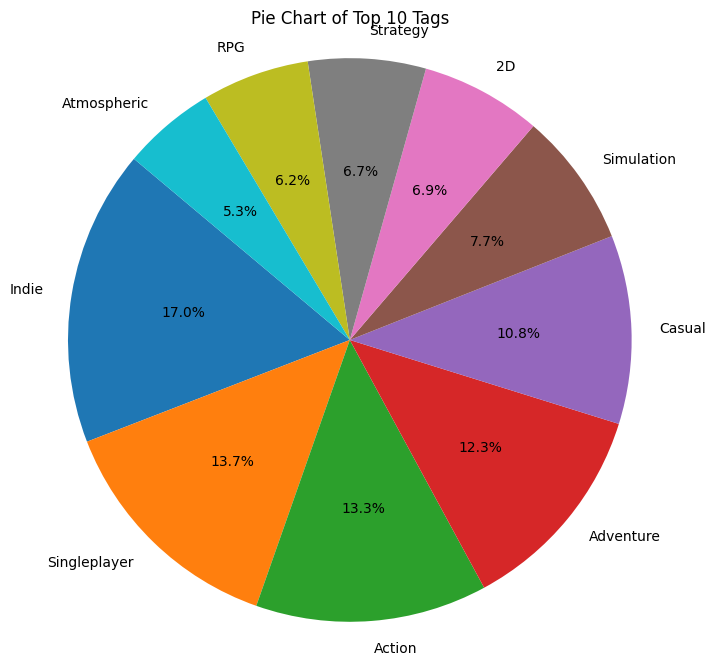

In [232]:
# count the number of unique value in the tags column
value_counts_series_t10 = df_clean_t1['tags'].value_counts().head(10)

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(value_counts_series_t10, labels=value_counts_series_t10.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top 10 Tags')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [233]:
value_counts_series_t10

tags
Indie           28043
Singleplayer    22679
Action          21942
Adventure       20269
Casual          17862
Simulation      12716
2D              11443
Strategy        11139
RPG             10170
Atmospheric      8809
Name: count, dtype: int64

The top 10 tags at least covered more than 50% of the records, so we only keep the top 10 tags in the dataframe.

In [234]:
# create list of top 10 most common tags
top10_tag = value_counts_series_t10.index.tolist()

# set up the list of columns that are not going to drop
allowed_columns = top10_tag + groupby_columns

# drop columns that are not in the 'allowed_columns' list
filtered_df = aggregated_df.drop(columns=[col for col in aggregated_df.columns if col not in allowed_columns])

filtered_df

,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,positive_YN,...,2D,Action,Adventure,Atmospheric,Casual,Indie,RPG,Simulation,Singleplayer,Strategy
0,20,True,True,True,85,5146,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,False,False
1,30,True,True,True,87,3489,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,True,True
2,40,True,True,True,79,1757,4.99,4.99,0.0,0,...,False,True,False,False,False,False,False,False,False,False
3,50,True,True,True,95,14057,4.99,4.99,0.0,1,...,False,True,True,True,False,False,False,False,True,False
4,60,True,True,True,80,3395,4.99,4.99,0.0,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49875,2466750,True,False,False,90,11,0.99,0.99,0.0,1,...,True,True,False,False,True,True,True,False,True,False
49876,2470720,True,False,False,100,12,4.49,4.99,10.0,1,...,False,True,False,False,False,True,True,False,False,True
49877,2471820,True,False,False,60,23,1.39,1.99,30.0,0,...,False,True,True,True,False,False,True,True,True,False
49878,2478270,True,False,False,100,14,0.00,0.00,0.0,1,...,False,False,True,False,False,False,False,False,True,False


Now the dataframe only has 49880 rows × 21 columns

In [235]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49880 entries, 0 to 49879
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          49880 non-null  int64  
 1   win             49880 non-null  bool   
 2   mac             49880 non-null  bool   
 3   linux           49880 non-null  bool   
 4   positive_ratio  49880 non-null  int64  
 5   user_reviews    49880 non-null  int64  
 6   price_final     49880 non-null  float64
 7   price_original  49880 non-null  float64
 8   discount        49880 non-null  float64
 9   positive_YN     49880 non-null  int64  
 10  discount_YN     49880 non-null  int64  
 11  2D              49880 non-null  bool   
 12  Action          49880 non-null  bool   
 13  Adventure       49880 non-null  bool   
 14  Atmospheric     49880 non-null  bool   
 15  Casual          49880 non-null  bool   
 16  Indie           49880 non-null  bool   
 17  RPG             49880 non-null 

In [236]:
filtered_df.columns

Index(['app_id', 'win', 'mac', 'linux', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'positive_YN',
       'discount_YN', '2D', 'Action', 'Adventure', 'Atmospheric', 'Casual',
       'Indie', 'RPG', 'Simulation', 'Singleplayer', 'Strategy'],
      dtype='object')

In [237]:
# drop the 'app_id' column

filtered_df_lr = filtered_df.drop(['app_id'], axis=1)

                     win       mac     linux  positive_ratio  user_reviews  \
win             1.000000  0.073996  0.057952       -0.104481      0.019422   
mac             0.073996  1.000000  0.627093        0.074014      0.041757   
linux           0.057952  0.627093  1.000000        0.070869      0.039240   
positive_ratio -0.104481  0.074014  0.070869        1.000000      0.076813   
user_reviews    0.019422  0.041757  0.039240        0.076813      1.000000   
price_final     0.037706 -0.012953 -0.022192        0.008739      0.146287   
price_original  0.041673 -0.019809 -0.024743        0.015466      0.156898   
discount        0.013787 -0.037042 -0.017320        0.005176      0.003756   
positive_YN    -0.092599  0.061727  0.058017        0.793458      0.078017   
discount_YN     0.013534 -0.040645 -0.019189        0.029807      0.001241   
2D              0.064870  0.083874  0.072184        0.189273     -0.002145   
Action          0.046027 -0.109596 -0.050276       -0.033128    

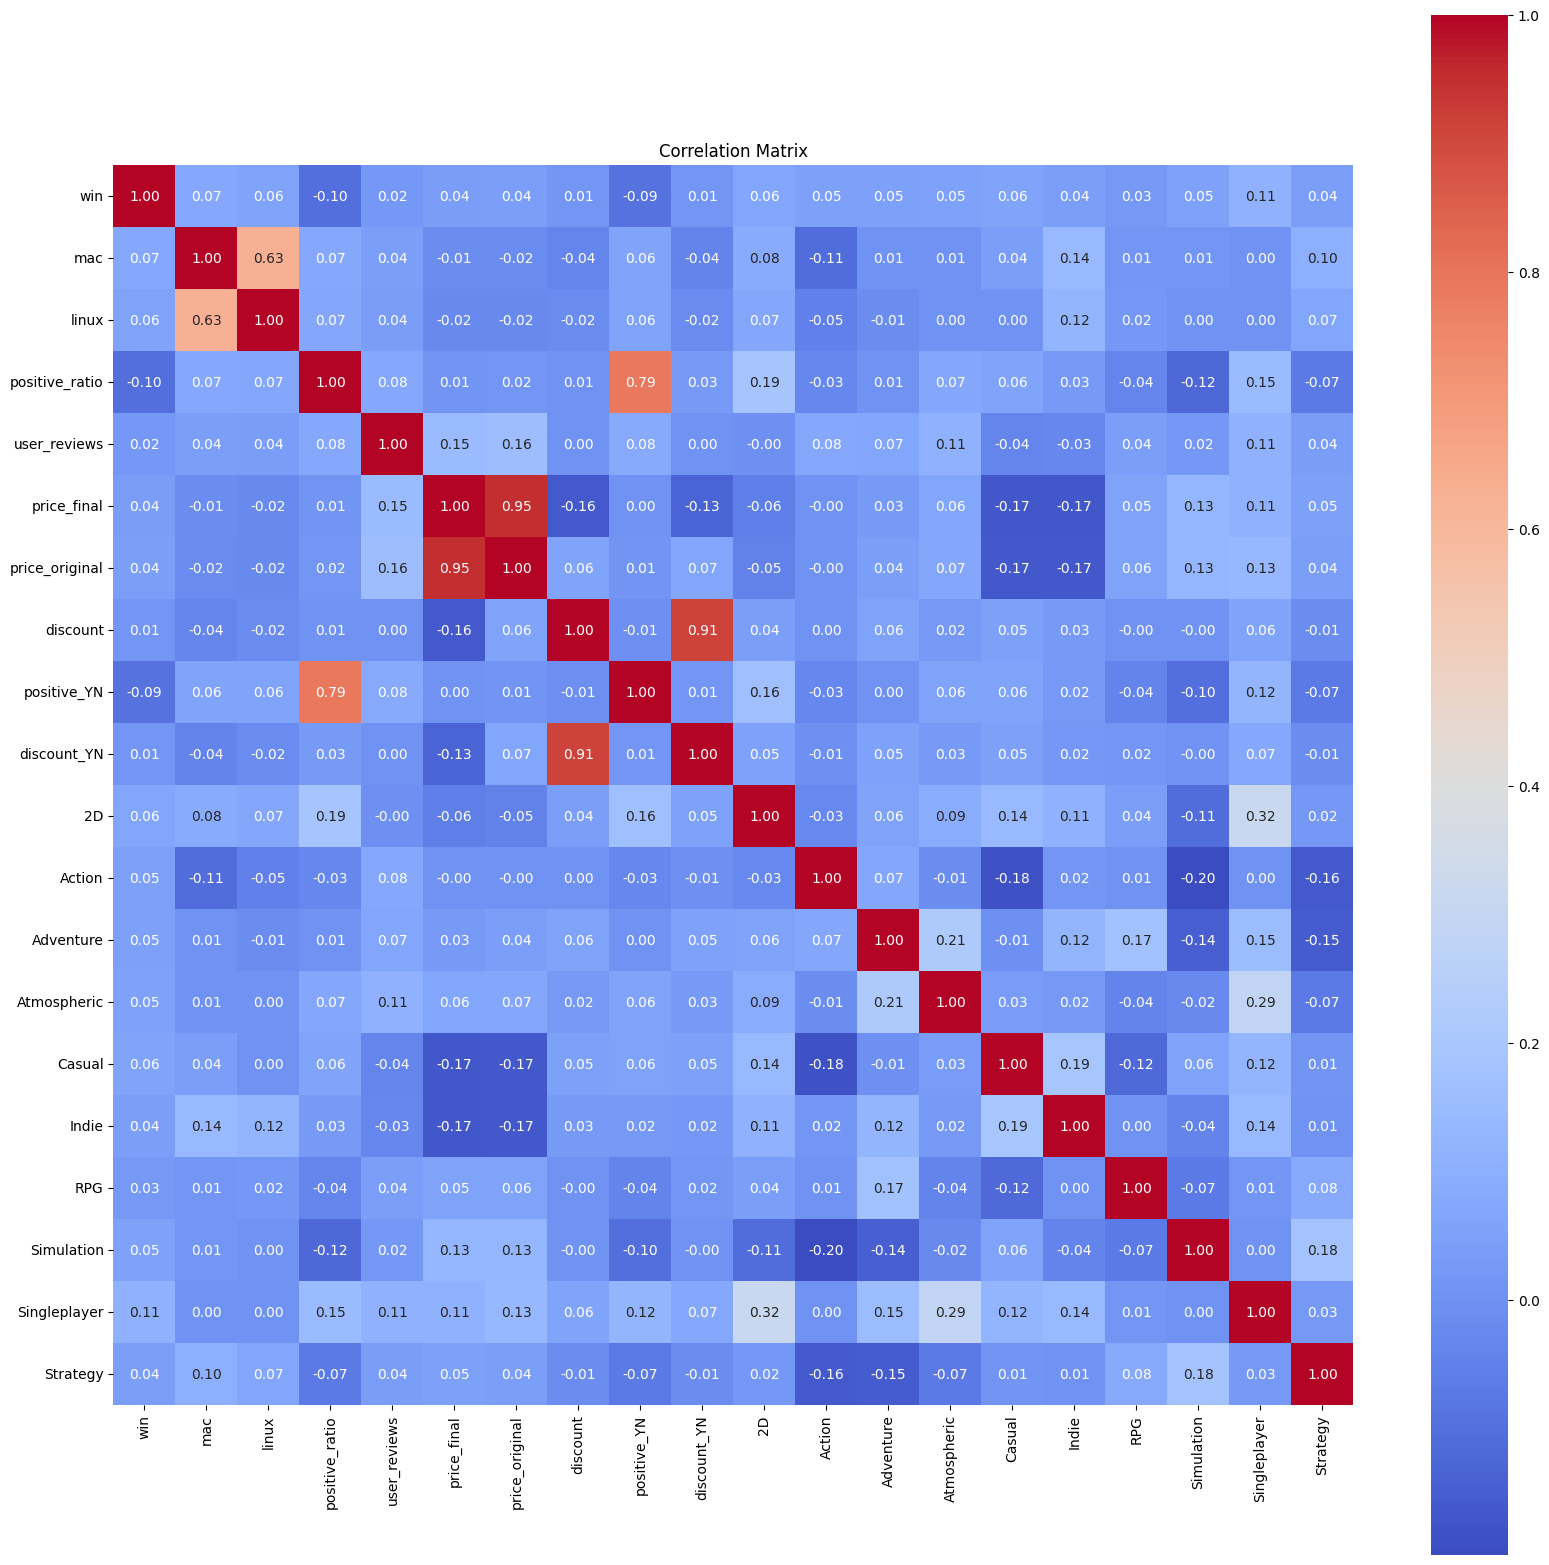

In [238]:
# Get all column names as a list
column_names = filtered_df_lr.columns.tolist()


# Combine all column names into a single variable
correlation_matrix = filtered_df_lr[column_names].corr()

print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [239]:
filtered_df_lr.columns

Index(['win', 'mac', 'linux', 'positive_ratio', 'user_reviews', 'price_final',
       'price_original', 'discount', 'positive_YN', 'discount_YN', '2D',
       'Action', 'Adventure', 'Atmospheric', 'Casual', 'Indie', 'RPG',
       'Simulation', 'Singleplayer', 'Strategy'],
      dtype='object')

## Model

In [240]:
log = LogisticRegression(max_iter=2000)
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC(probability=True)

In [241]:
X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuracy: 0.5982357658380112
Precision: 0.6179775280898876
Recall: 0.6805170821791321
F1-score: 0.6477412550536124


Print coef

In [242]:
# Print the coefficients
coefficients = best_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coefficients_df)

           Feature  Coefficient
0              win    -0.304196
1              mac     0.161039
2            linux     0.150887
3     user_reviews     0.000057
4      price_final     0.003109
5   price_original     0.001602
6      discount_YN     0.035120
7               2D     0.695640
8           Action    -0.212577
9        Adventure    -0.199596
10     Atmospheric     0.053078
11          Casual     0.127773
12           Indie    -0.028085
13             RPG    -0.239416
14      Simulation    -0.463039
15    Singleplayer     0.275972
16        Strategy    -0.429031


           Feature  Coefficient
0              win    -0.876276
1              mac     0.222383
2            linux     0.196583
3      discount_YN     0.111338
4               2D     0.680137
5           Action    -0.182229
6        Adventure    -0.163240
7      Atmospheric     0.162361
8           Casual     0.125268
9            Indie    -0.030284
10             RPG    -0.181646
11      Simulation    -0.459707
12    Singleplayer     0.350561
13        Strategy    -0.326554
14    user_reviews     0.463208
15     price_final     0.001757
16  price_original     0.067196

In [173]:
# logistic regression 2 - Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) 


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuracy: 0.6116680032076984
Precision: 0.7748953974895397
Recall: 0.6467383712809052
F1-score: 0.7050403532815593


In [175]:
# logistic regression 3 - Oversampling (SMOTE - Synthetic Minority Over-sampling Technique)
from imblearn.under_sampling import RandomUnderSampler

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuracy: 0.576383319967923
Precision: 0.8139584671376578
Recall: 0.5310797597429808
F1-score: 0.6427726120033812


In [ ]:
''' from imblearn.over_sampling import ADASYN

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training set
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) '''

' from imblearn.over_sampling import ADASYN\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply Random Under-Sampling to the training set\nadasyn = ADASYN(random_state=42)\nX_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# extract the best params\nbest_params = grid_search.bes

In [ ]:
'''from imblearn.combine import SMOTETomek

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTETomek to the training set
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)'''

'from imblearn.combine import SMOTETomek\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply SMOTETomek to the training set\nsmote_tomek = SMOTETomek(random_state=42)\nX_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# extract the best params\nbest_params = grid_search.bes

In [ ]:
'''from imblearn.over_sampling import RandomOverSampler

X = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','app_id','discount'])
y = filtered_df_lr['positive_YN']

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Over-Sampling with Replacement to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Range of regularization parameters
    'penalty': ['l1', 'l2'],     # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']      # Solver to use for optimization
}

logistic_model = LogisticRegression()

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# extract the best params
best_params = grid_search.best_params_

# extract the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) '''

'from imblearn.over_sampling import RandomOverSampler\n\nX = filtered_df_lr.drop(columns=[\'positive_YN\', \'positive_ratio\',\'app_id\',\'discount\'])\ny = filtered_df_lr[\'positive_YN\']\n\n# Assuming you have your data in X (features) and y (target) format\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Apply Random Over-Sampling with Replacement to the training set\nros = RandomOverSampler(random_state=42)\nX_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)\n\nparam_grid = {\n    \'C\': np.logspace(-3, 3, 7),  # Range of regularization parameters\n    \'penalty\': [\'l1\', \'l2\'],     # Regularization type (\'l1\' for Lasso, \'l2\' for Ridge)\n    \'solver\': [\'liblinear\']      # Solver to use for optimization\n}\n\nlogistic_model = LogisticRegression()\n\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1)\ngrid_search.fit(X_train_resampled, y_train_resampled)\n\n# extract the best params

In [243]:
# use the tags as the feature

X = np.array(filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount']))
y = np.array(filtered_df_lr['positive_YN'])

In [244]:
# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(probability=True)

In [274]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [275]:
print(f1_score(y_test, pred_l))
print(f1_score(y_test, pred_nb))
print(f1_score(y_test, pred_knn))
print(f1_score(y_test, pred_svc))

0.6328244964321199
0.465416772232075
0.6018978761861726
0.703657981937496


In [276]:
print(accuracy_score(y_test, pred_l))
print(accuracy_score(y_test, pred_nb))
print(accuracy_score(y_test, pred_knn))
print(accuracy_score(y_test, pred_svc))

0.5925220529270249
0.5769847634322374
0.5584402566158782
0.5428027265437049


In [277]:
print(precision_score(y_test, pred_l))
print(precision_score(y_test, pred_nb))
print(precision_score(y_test, pred_knn))
print(precision_score(y_test, pred_svc))

0.6193422913719944
0.7410246066962485
0.5893805309734513
0.5428027265437049


In [279]:
print(recall_score(y_test, pred_l))
print(recall_score(y_test, pred_nb))
print(recall_score(y_test, pred_knn))
print(recall_score(y_test, pred_svc))

0.6469067405355494
0.33924284395198523
0.6149584487534626
1.0


In [260]:
print(cross_val_score(log, X_train, y_train, cv=5, scoring='roc_auc'))
print(cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc'))
print(cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc'))
print(cross_val_score(svc, X_train, y_train, cv=5, scoring='roc_auc'))


[0.64545391 0.64342075 0.64902301 0.63606586 0.65032123]
[0.64585152 0.64713883 0.64449349 0.64574776 0.64932202]
[0.57846967 0.57090449 0.57613102 0.57021632 0.57201797]
[0.6207098  0.60788916 0.60761787 0.58970288 0.61358762]


In this project we will focus on recommending the games with true positive rate, therefore we are focusing on the precision score which the model can predict the game with true positive comment.</br>
Since we can see that GaussianNB model is having the highest Precision Score, and the accuracy is also the second highest (0.57) and a littble bit lower than the highest (0.59). Therefore, we are picking the GaussianNB as our best model.</br>
The reason for us to choose Precision Score over Recall is because we want to predict the games which are truly having positive comment. Besides, the reason for us choosing accuracy over F1 score is because the data we are having is balanced.</br>
Although we choose GaussianNB as our best model, we will still build up a Logistic Regression Model to see the coefficient of all the features, and it is having the highest accuracy rate and second highest Precision.</br>

In [261]:
pred_l_prob = log.predict_proba(X_test)

In [262]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

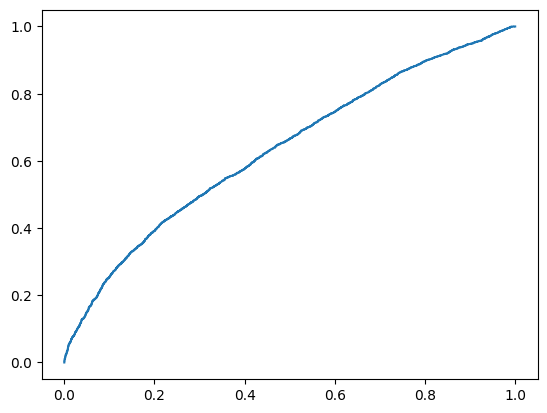

In [263]:
plt.plot(fpr, tpr)

### Logistic Regression
We want the model to focus on predicting the game which are true positive, therefore the target of the Randomsearch is Precision

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array(filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount']))
y = np.array(filtered_df_lr['positive_YN'])

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LogisticRegression model with increased max_iter
logistic_reg = LogisticRegression()  # Increase max_iter to a larger value

# Fit the logistic regression model on the scaled data
logistic_reg.fit(X_train, y_train)

# Create a LogisticRegression model with increased max_iter and balanced class weight
logistic_reg = LogisticRegression(max_iter=20000, class_weight='balanced')  # Increase max_iter to a larger value

# Define the hyperparameter grid for random search
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization solver
}

# Create the RandomizedSearchCV object with logistic_reg as the estimator
random_search = RandomizedSearchCV(
    estimator=logistic_reg,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='precision',  # Use precision as the metric to evaluate the model
    cv=5,  # 5-fold cross-validation
    random_state=42
)

# Fit the RandomizedSearchCV object on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict the target values on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6058540497193264
Precision: 0.6672682156553125
Recall: 0.5462603878116343
F1-score: 0.6007311129163282


In [283]:
# Print the coefficients
coefficients = best_model.coef_[0]
feature_names = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount']).columns

# Create a DataFrame to store coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coefficients_df)

           Feature  Coefficient
0              win    -1.289518
1              mac     0.183287
2            linux     0.160190
3     user_reviews     0.000053
4      price_final     0.002367
5   price_original     0.002749
6      discount_YN     0.008975
7               2D     0.662905
8           Action    -0.177679
9        Adventure    -0.166502
10     Atmospheric     0.070049
11          Casual     0.147074
12           Indie    -0.015548
13             RPG    -0.219926
14      Simulation    -0.445236
15    Singleplayer     0.343706
16        Strategy    -0.385846


### Naive Bayes

In [287]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

X = np.array(filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount']))
y = np.array(filtered_df_lr['positive_YN'])

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter search space
param_dist = {
    'var_smoothing': np.logspace(-10, 0, num=100)  # Search space for Laplace smoothing parameter
}

# Create a RandomizedSearchCV object with the Naive Bayes classifier and hyperparameter search space
random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='precision', random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_nb_estimator = random_search.best_estimator_

# Predict the target values on the test data
y_pred = best_nb_estimator.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.48606655974338414
Precision: 0.788
Recall: 0.07276084949215143
F1-score: 0.13322062552831784


In [288]:
best_nb_estimator

GaussianNB(var_smoothing=1.6681005372000592e-08)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Fit the KNeighborsClassifier model on the scaled data
knn.fit(X_train_scaled, y_train)

# Define the hyperparameter search space as a dictionary
knn_params = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform the hyperparameter tuning using RandomizedSearchCV with cross-validation
rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=50, cv=5, scoring='recall', random_state=42)
rs_knn.fit(X_train_scaled, y_train)

# Retrieve the best estimator from the RandomizedSearchCV
best_knn_estimator = rs_knn.best_estimator_



In [ ]:
best_knn_estimator

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create an SVC model
svc = SVC()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=2, cv=5, scoring='recall')
rs_svc.fit(X_train_scaled, y_train)
best_svc_estimator = rs_svc.best_estimator_

In [ ]:
best_svc_estimator

SVC(kernel='linear')

## Build up the pipeline

In [289]:
# use the tags as the feature

X = np.array(filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio','discount']))
y = np.array(filtered_df_lr['positive_YN'])

In [290]:
# separate features and target
categorical_columns = filtered_df_lr.drop(columns=['positive_YN', 'positive_ratio', 'discount', 'user_reviews', 'price_final', 'price_original']).columns.tolist()
numerical_columns = ['user_reviews', 'price_final', 'price_original'] 
target = 'positive_YN'

In [291]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(filtered_df_lr[categorical_columns + numerical_columns],filtered_df_lr[target], test_size = 0.2, random_state=1234)

In [292]:
# define transformers
cat_transformer = Pipeline(steps=[('passthrough', 'passthrough')])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [293]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [294]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('passthrough',
                                                  'passthrough')]),
                                 ['win', 'mac', 'linux', 'discount_YN', '2D',
                                  'Action', 'Adventure', 'Atmospheric',
                                  'Casual', 'Indie', 'RPG', 'Simulation',
                                  'Singleplayer', 'Strategy']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['user_reviews', 'price_final',
                                  'price_original'])])

### NB

In [296]:
# build linear regression model

nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', best_nb_estimator)
])

In [297]:
nb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['win', 'mac', 'linux',
                                                   'discount_YN', '2D',
                                                   'Action', 'Adventure',
                                                   'Atmospheric', 'Casual',
                                                   'Indie', 'RPG', 'Simulation',
                                                   'Singleplayer',
                                                   'Strategy']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['user_reviews',
                                                   'price_final',
                                                   'price_original'])])),
                ('regressor',
                 GaussianNB(var_smoothing=1.6681005372000592e-08))])

In [298]:
pred_nb = nb.predict(X_test)

In [299]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, pred_nb)
precision = precision_score(y_test, pred_nb)
recall = recall_score(y_test, pred_nb)
f1 = f1_score(y_test, pred_nb)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5344827586206896
Precision: 0.7547495682210709
Recall: 0.23711340206185566
F1-score: 0.36085879438480595


In [171]:
# Access the logistic regression model from the pipeline
logistic_regression_model = logistic_regression.named_steps['regressor']

# Get the feature names from the preprocessor
categorical_features = categorical_columns
numerical_features = numerical_columns
all_features = categorical_features + numerical_features  # Correct order for ColumnTransformer

# Get the coefficients from the logistic regression model
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})

# Print the DataFrame
print(coefficients_df)

           Feature  Coefficient
0              win    -0.876276
1              mac     0.222383
2            linux     0.196583
3      discount_YN     0.111338
4               2D     0.680137
5           Action    -0.182229
6        Adventure    -0.163240
7      Atmospheric     0.162361
8           Casual     0.125268
9            Indie    -0.030284
10             RPG    -0.181646
11      Simulation    -0.459707
12    Singleplayer     0.350561
13        Strategy    -0.326554
14    user_reviews     0.463208
15     price_final     0.001757
16  price_original     0.067196


In [166]:
logreg_estimator = logistic_regression.named_steps['regressor']

# Get the coefficients
coefficients = logreg_estimator.coef_
feature_names = X.columns



In [167]:
total_value = coefficients.size
total_value

17

In [121]:
len(feature_names)

17

In [169]:
# Flatten the coefficients array
coefficients_flat = np.ravel(coefficients)  # or coefficients.squeeze()

# Create a DataFrame to store coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_flat})

print(coefficients_df)

           Feature  Coefficient
0              win    -0.876276
1              mac     0.222383
2            linux     0.196583
3     user_reviews     0.111338
4      price_final     0.680137
5   price_original    -0.182229
6      discount_YN    -0.163240
7               2D     0.162361
8           Action     0.125268
9        Adventure    -0.030284
10     Atmospheric    -0.181646
11          Casual    -0.459707
12           Indie     0.350561
13             RPG    -0.326554
14      Simulation     0.463208
15    Singleplayer     0.001757
16        Strategy     0.067196


In [111]:
feature_names = X.columns
feature_names

Index(['win', 'mac', 'linux', 'user_reviews', 'price_final', 'price_original',
       'discount_YN', '2D', 'Action', 'Adventure', 'Atmospheric', 'Casual',
       'Indie', 'RPG', 'Simulation', 'Singleplayer', 'Strategy'],
      dtype='object')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_svc_prob[:,1])

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
best_log_reg

In [ ]:
knn_params = {'n_neighbors':range(3,300)}

rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=200, cv=10, scoring='f1')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_

In [ ]:
svc_params = {'kernel':['linear','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=10, scoring='f1')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_ 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to X_test

# Create and train the models
log_best = LogisticRegression(C=1.592282793341094, penalty='l1', solver='saga')
knn_best = KNeighborsClassifier(n_neighbors=283)


log_best.fit(X_train_scaled, y_train)
knn_best.fit(X_train_scaled, y_train)

# Make predictions
pred_log_best = log_best.predict(X_test_scaled)
pred_knn_best = knn_best.predict(X_test_scaled)

# Evaluate the models
print(f"F1 score for Logistic Regression: {f1_score(pred_log_best, y_test)}")
print(f"F1 score for KNN: {f1_score(pred_knn_best, y_test)}")


In [ ]:
cat_columns = ['win','mac','linux','steam_deck']
num_columns = ['positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']
target = 'positive_or_not'

In [ ]:
# build pipeline
cat_transformer = OneHotEncoder()
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)